# Importing Necessary Libraries

In [1]:
from nltk.corpus import stopwords
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , confusion_matrix ,ConfusionMatrixDisplay, classification_report
from sklearn.naive_bayes import MultinomialNB

In [2]:
stop_words = stopwords.words("english") #importing stopwords from nltk Library

In [3]:
stop_words #List of stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
stop_words_dict = {}  #Convert stopwords into dictionary for easy checking
for i in stop_words:
    stop_words_dict[i] = 1

In [5]:
#Making Dictionary of document_id and corresponding genre
folder_path = r"C:\Users\DELL\Desktop\Text_classification dataset\20_newsgroups"

def db_files(path):
    db = {"id" : [],
         "genre" : []}
    folder_names = os.listdir(path)
    for f_name in folder_names:
        new_path = path + "\{}".format(f_name)
        files = os.listdir(new_path)
        n = len(files)
        db["id"] += files
        db["genre"] += [f_name]*n
        
    return db

In [6]:
db = db_files(folder_path) #Calling function

In [7]:
#Converting Dictionary into DataFrame
df = pd.DataFrame(db)

In [8]:
df.shape

(19997, 2)

In [9]:
df.head()

,id,genre
0,49960,alt.atheism
1,51060,alt.atheism
2,51119,alt.atheism
3,51120,alt.atheism
4,51121,alt.atheism


In [10]:
X = df.iloc[:,0] #Separating input and output variables
y = df.iloc[:,1]

In [11]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.25 ,random_state=0)

In [12]:
len(y_train.unique())

20

In [13]:
def remove_special(text):  #This functions converts a text into alphanumeric text separated by space
    x = ""
    for i in text:
        if i.isalnum():
            x += i
        else:
            x += " "
    return x

In [14]:
#Making Vocabulary over the training data along with the frequencty of words.
vocablary = {}
for i in range(X_train.shape[0]):
    obj =open(folder_path + "\{}".format(y_train.iloc[i]) + "\{}".format(X_train.iloc[i])) #Opening documents
    file_data = obj.read() #Reading Documents
    file_data = file_data.lower() #Converting every word within the document into lower case for consistency
    file_data = remove_special(file_data) #Removing Special characters
    words = file_data.split() #Splitting string over space
    for word in words:
        if stop_words_dict.get(word,0) == 1:  #this part of code skip the word if it is a stopword
            continue
        vocablary[word] = vocablary.get(word,0) + 1
    obj.close()

In [15]:
print(len(vocablary.keys())) #No of words in the vocablary

177053


In [16]:
voca = pd.Series(vocablary)
voca_sorted = voca.sort_values(ascending = False) #Sorting the vocabulary on the basis of their frequency in descending order. 

In [17]:
top_words = voca_sorted[:2500].index #Selecting top 2500 words
top_words_dict = {} #Maintaining a dictionary for easy access.
for item in top_words.values:
    top_words_dict[item] = 1

In [18]:
#Making vocabulary along with frequency count of the words over the training set
def make_voca(X_train,y_train,top_words_dict,folder_path):
    voca = {}
    voca["total_count"] = y_train.shape[0] #saving total rows in y_train
    n_classes = set(y_train.values)  #unique classess in y_Train
    for curr_class in n_classes:
        voca[curr_class] = {}
        y_curr_class = y_train[y_train == curr_class]  #extracting data with current class
        x_curr_class = X_train[y_train == curr_class]
        voca[curr_class]["class_count"] = (y_train == curr_class).sum() #Saving number of rows of current class
        total_possible_values = 0 #this variable stores total number of values of all features within current class
        for i in range(x_curr_class.shape[0]):
            obj = open(folder_path + "\{}".format(y_curr_class.iloc[i]) + "\{}".format(x_curr_class.iloc[i]))
            file_data = obj.read() #Reading text file
            file_data = file_data.lower() #Converting into lower case
            file_data = remove_special(file_data) #Removing Special Characters
            words = file_data.split() #Splitting on spaces
            for word in words:
                if top_words_dict.get(word,0) == 1:          #Making frequency count of words according to updated vocabulary
                    voca[curr_class][word] = voca[curr_class].get(word,0) + 1
                    total_possible_values += 1
                    
            obj.close()
                
        for item in top_words_dict:
            if voca[curr_class].get(item,0) == 0:   #Filling features with zero value if a feature does not occur in above code
                
                voca[curr_class][item] = 0
        voca[curr_class]["total_values_for_class"] = total_possible_values #Saving total number of values
                
    return voca   #Returning Vocabulary with frequencies
                
                    
        

In [19]:
X_train_voca = make_voca(X_train,y_train,top_words_dict,folder_path) #Calling function over training data

In [20]:
X_train_voca.keys() #Keys of Vocabulary

dict_keys(['total_count', 'rec.autos', 'talk.religion.misc', 'sci.electronics', 'comp.sys.ibm.pc.hardware', 'soc.religion.christian', 'comp.os.ms-windows.misc', 'rec.sport.baseball', 'alt.atheism', 'sci.crypt', 'comp.graphics', 'misc.forsale', 'comp.sys.mac.hardware', 'rec.motorcycles', 'rec.sport.hockey', 'comp.windows.x', 'talk.politics.guns', 'talk.politics.misc', 'sci.space', 'talk.politics.mideast', 'sci.med'])

In [21]:
len(X_train_voca.keys())

21

In [22]:
X_test_paths = folder_path + '\\' + y_test + '\\' + X_test  #Making paths for testing data

In [23]:
X_test_paths.iloc[0]  #Example of testing data path

'C:\\Users\\DELL\\Desktop\\Text_classification dataset\\20_newsgroups\\comp.windows.x\\66950'

In [24]:
#Making a predict function to determine the classes of testing data

def probability(local_features,X_train_voca,curr_class,top_words_dict):
    output = np.log(X_train_voca[curr_class]["class_count"] / X_train_voca["total_count"]) #prior class probability

            
    total_features = len(X_train_voca[curr_class].keys()) - 2  #No of features 
    for feature in local_features:
        num = (X_train_voca[curr_class][feature] + 1)   #Laplace Correction
        den = (X_train_voca[curr_class]["total_values_for_class"] + total_features)
        output += (np.log(num/den))*local_features[feature]
        
    return output #Returning output (Conditional probability)
    


def Singlepointprediction(x,X_train_voca,top_words_dict): #Calculates class for a single point
    classes = X_train_voca.keys()  #classes including total count
    final_class = 0
    value = -1 * np.inf
    
    local_features = {}
    obj = open(x) #opening current documnent
    file_data = obj.read() #Reading document
    file_data = file_data.lower() #Converting to lower case
    file_data = remove_special(file_data) #Removing Special Characters
    words = file_data.split() #Splitting data over spaces
    for word in words:
        if top_words_dict.get(word,0) == 1:
            local_features[word] = local_features.get(word,0) + 1    #Making frequency count of words of test data
            
    for item in top_words_dict:
        if local_features.get(item,0) == 0:   #Filling features which didnot appear above with 0 frequency.
            local_features[item] = 0
    
    obj.close() #Closing document
    
    
    for curr_class in classes:  #Iterating over classes
        if curr_class == "total_count":
            continue
        val = probability(local_features,X_train_voca,curr_class,top_words_dict)  #Calling probabibilty function to calculate
        if val > value :                                                         #conditional probaility of current class.
            final_class = curr_class
            value = val
            
    return final_class  #Returning final class
        
                
    


def predict(X_test_paths ,X_train_voca,top_words_dict):  #Predict function
    y_pred = []
    for x in X_test_paths:
        final_class = Singlepointprediction(x,X_train_voca,top_words_dict)
        y_pred.append(final_class)
        
    return y_pred

In [25]:
y_predict = predict(X_test_paths,X_train_voca,top_words_dict)  #predicting classes over testing data

In [26]:
y_predict #Predicted classes

['comp.windows.x',
 'sci.med',
 'talk.politics.guns',
 'misc.forsale',
 'rec.sport.hockey',
 'talk.religion.misc',
 'comp.sys.mac.hardware',
 'comp.sys.ibm.pc.hardware',
 'sci.space',
 'comp.graphics',
 'talk.politics.misc',
 'comp.sys.mac.hardware',
 'talk.politics.guns',
 'soc.religion.christian',
 'rec.sport.hockey',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.ibm.pc.hardware',
 'sci.electronics',
 'comp.sys.ibm.pc.hardware',
 'talk.politics.misc',
 'talk.politics.guns',
 'misc.forsale',
 'talk.religion.misc',
 'rec.sport.baseball',
 'sci.electronics',
 'comp.sys.mac.hardware',
 'comp.sys.ibm.pc.hardware',
 'sci.crypt',
 'sci.med',
 'talk.religion.misc',
 'sci.space',
 'misc.forsale',
 'soc.religion.christian',
 'sci.med',
 'soc.religion.christian',
 'comp.sys.mac.hardware',
 'talk.religion.misc',
 'sci.med',
 'rec.sport.baseball',
 'rec.motorcycles',
 'soc.religion.christian',
 'comp.sys.ibm.pc.hardware',
 'talk.politics.mideast',
 'sci.space',
 'comp.sys.mac.hardware',
 'talk.politics

Accuracy Score :  0.8128
                          precision    recall  f1-score   support

             alt.atheism       0.79      0.82      0.81       233
           comp.graphics       0.70      0.81      0.75       253
 comp.os.ms-windows.misc       0.60      0.02      0.05       249
comp.sys.ibm.pc.hardware       0.48      0.86      0.62       240
   comp.sys.mac.hardware       0.73      0.87      0.79       236
          comp.windows.x       0.83      0.71      0.77       240
            misc.forsale       0.82      0.89      0.86       261
               rec.autos       0.85      0.90      0.87       269
         rec.motorcycles       0.88      0.97      0.92       284
      rec.sport.baseball       0.86      0.93      0.90       248
        rec.sport.hockey       0.95      0.82      0.88       231
               sci.crypt       0.97      0.95      0.96       233
         sci.electronics       0.84      0.88      0.86       244
                 sci.med       0.93      0.84     

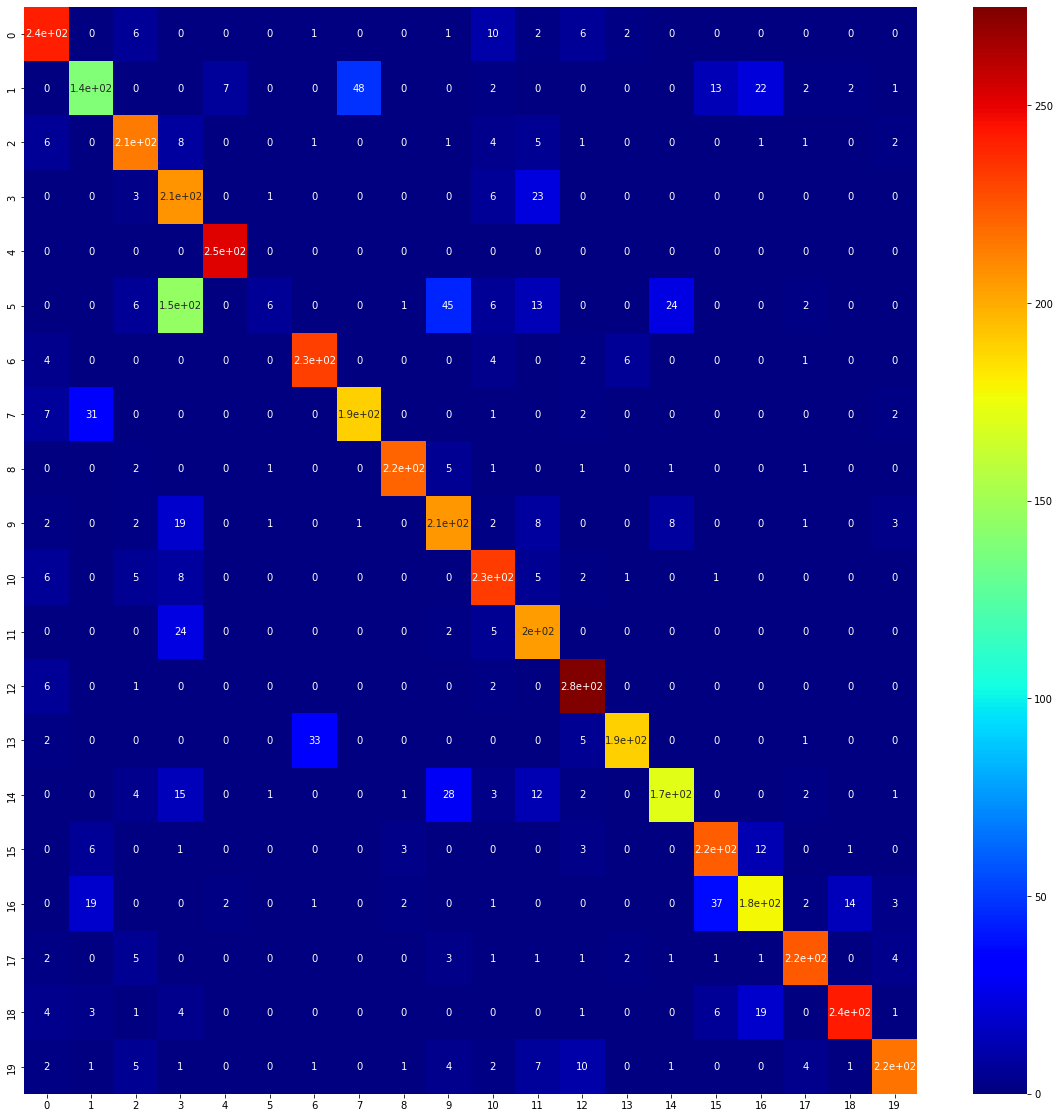

In [39]:
print("Accuracy Score : ",accuracy_score(y_test.values,y_predict))  #Printing accuracy score
clr = confusion_matrix(y_test,y_predict,labels = list(set(y)))

plt.figure(figsize = (20,20))

sns.heatmap(clr,cmap="jet",annot=True) #Plotting Confusion Matrix over heatmap. 

print(classification_report(y_test,y_predict))  #Classification report of my implementation of Naive bayes (Multinomial) 

In [28]:
print(clr) #Confusion Matrix

[[241   0   6   0   0   0   1   0   0   1  10   2   6   2   0   0   0   0
    0   0]
 [  0 139   0   0   7   0   0  48   0   0   2   0   0   0   0  13  22   2
    2   1]
 [  6   0 214   8   0   0   1   0   0   1   4   5   1   0   0   0   1   1
    0   2]
 [  0   0   3 207   0   1   0   0   0   0   6  23   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 252   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   6 146   0   6   0   0   1  45   6  13   0   0  24   0   0   2
    0   0]
 [  4   0   0   0   0   0 231   0   0   0   4   0   2   6   0   0   0   1
    0   0]
 [  7  31   0   0   0   0   0 190   0   0   1   0   2   0   0   0   0   0
    0   2]
 [  0   0   2   0   0   1   0   0 221   5   1   0   1   0   1   0   0   1
    0   0]
 [  2   0   2  19   0   1   0   1   0 206   2   8   0   0   8   0   0   1
    0   3]
 [  6   0   5   8   0   0   0   0   0   0 233   5   2   1   0   1   0   0
    0   0]
 [  0   0   0  24   0   0   0   0   0   2   5 205   0   0   0   0

# Using Inbuilt sklearn Naive bayes 

In [29]:
top_words_dict  #top 2500 words

{'edu': 1,
 'ax': 1,
 'cmu': 1,
 'com': 1,
 'cs': 1,
 'news': 1,
 'srv': 1,
 '1': 1,
 'cantaloupe': 1,
 'net': 1,
 'message': 1,
 'subject': 1,
 'lines': 1,
 'date': 1,
 'id': 1,
 'apr': 1,
 'path': 1,
 'newsgroups': 1,
 'organization': 1,
 'state': 1,
 'gmt': 1,
 '2': 1,
 'x': 1,
 '1993': 1,
 'ohio': 1,
 'would': 1,
 'one': 1,
 '0': 1,
 '3': 1,
 'writes': 1,
 'article': 1,
 'comp': 1,
 'references': 1,
 'talk': 1,
 'misc': 1,
 'ca': 1,
 'ans': 1,
 'howland': 1,
 'sender': 1,
 'reston': 1,
 'people': 1,
 'like': 1,
 '4': 1,
 '5': 1,
 'university': 1,
 'posting': 1,
 'nntp': 1,
 'cc': 1,
 'mps': 1,
 '93': 1,
 'know': 1,
 'host': 1,
 'sci': 1,
 'get': 1,
 '6': 1,
 'zaphod': 1,
 'think': 1,
 'usenet': 1,
 'c': 1,
 'may': 1,
 'alt': 1,
 'p': 1,
 '7': 1,
 'politics': 1,
 'q': 1,
 'windows': 1,
 'also': 1,
 'r': 1,
 'w': 1,
 '8': 1,
 '20': 1,
 'time': 1,
 'e': 1,
 'rutgers': 1,
 'harvard': 1,
 'use': 1,
 'near': 1,
 'u': 1,
 'eng': 1,
 '16': 1,
 'new': 1,
 'us': 1,
 'rec': 1,
 '15': 1,
 'goo

In [30]:
#Making skeleton for dataframe
data_x = {}          
for item in top_words_dict:
    data_x[item] = [0]*(X.shape[0])

In [31]:
for i in range(X.shape[0]):
    obj =open(folder_path + "\{}".format(y.iloc[i]) + "\{}".format(X.iloc[i])) #opening document
    file_data = obj.read()#Reading document
    file_data = file_data.lower() #Converting into lower case
    file_data = remove_special(file_data) #Removing special characters
    words = file_data.split() #Spliting over spaces
    for word in words:
        if top_words_dict.get(word,0) == 1: #Making frequency of words (Bag of words)
            data_x[word][i] += 1
    obj.close()

In [32]:
#Converting into DataFrame
import pandas as pd
df_ = pd.DataFrame(data_x)

In [33]:
df_.shape #Shape of dataframe

(19997, 2500)

In [34]:
df_new = pd.concat((df_,y),axis = 1 ) #Concating input and output columns

In [35]:
#Train test split of whole dataset
X_train1 , X_test1 , y_train1 , y_test1 = train_test_split(df_new.iloc[:,:-1],df_new.iloc[:,-1] , test_size=.25 , random_state=0)

In [36]:
#IUsing inbuilt Multinomial Naive Bayes algorithm

obj = MultinomialNB()
obj.fit(X_train1 , y_train1) #fitting algorithm
y_pred1 = obj.predict(X_test1) #predicting

In [37]:
print("Accuracy Score  :",accuracy_score(y_test1,y_pred1)) #Accuracy score

Accuracy Score  : 0.8128


<AxesSubplot:>

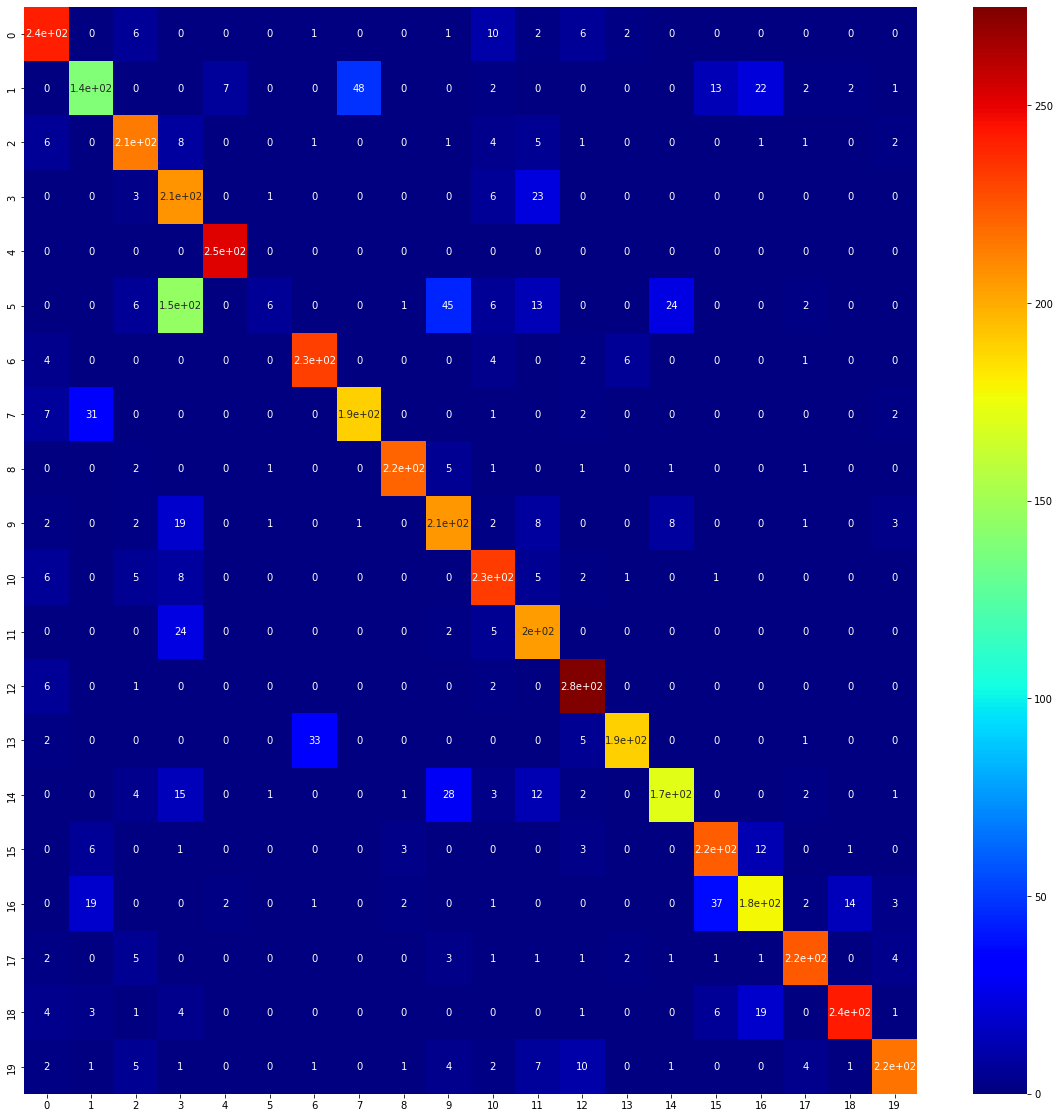

In [40]:
#plotting Confusion matrix inform of heatmap
clr1 = confusion_matrix(y_test1,y_pred1)
plt.figure(figsize = (20,20))
sns.heatmap(clr,cmap="jet",annot=True)

In [41]:
print(classification_report(y_test1 , y_pred1)) #Classification report of inbuilt sklearn's Naive bayes (Multinomial) 

                          precision    recall  f1-score   support

             alt.atheism       0.79      0.82      0.81       233
           comp.graphics       0.70      0.81      0.75       253
 comp.os.ms-windows.misc       0.60      0.02      0.05       249
comp.sys.ibm.pc.hardware       0.48      0.86      0.62       240
   comp.sys.mac.hardware       0.73      0.87      0.79       236
          comp.windows.x       0.83      0.71      0.77       240
            misc.forsale       0.82      0.89      0.86       261
               rec.autos       0.85      0.90      0.87       269
         rec.motorcycles       0.88      0.97      0.92       284
      rec.sport.baseball       0.86      0.93      0.90       248
        rec.sport.hockey       0.95      0.82      0.88       231
               sci.crypt       0.97      0.95      0.96       233
         sci.electronics       0.84      0.88      0.86       244
                 sci.med       0.93      0.84      0.88       256
         

In [42]:
stopwords_df = pd.DataFrame(stop_words)
stopwords_df.to_csv("stopwords.csv",index = False , header=False) #Converting stopwords into csv file

In [43]:
stopwords_df

,0
0,i
1,me
2,my
3,myself
4,we
...,...
174,weren't
175,won
176,won't
177,wouldn


# Conclusion


Both models, inbuilt as well as my implementation have same accuracy of 81.28%